<a href="https://colab.research.google.com/github/nchibana/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [8]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4816.58","4816.58","1130.71","1130.71","783.42","347.29","0.0","0.0","0.0","Apr-2019","190.21","May-2019","Apr-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.95

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [10]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')

print(df.shape)
df.head()

(128412, 144)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      10000        10000          10000.0   36 months   
1 NaN        NaN       9600         9600           9600.0   36 months   
2 NaN        NaN       4000         4000           4000.0   36 months   
3 NaN        NaN       2500         2500           2500.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

  int_rate  installment grade sub_grade    emp_title emp_length  \
0   10.33%       324.23     B        B1          NaN   < 1 year   
1   12.98%       323.37     B        B5          NaN        NaN   
2   23.40%       155.68     E        E1     Security    3 years   
3   13.56%        84.92     C        C1         Chef  10+ years   
4   18.94%       777.23     D        D2  Postmaster   10+ years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0       MORTGAGE    280000.0        Not Verified  Dec-2018     Current   
1       MORTGAGE     35704.0        Not Verified  Dec-2018     Current   
2           RENT     90000.0     Source Verified  Dec-2018     Current   
3           RENT     55000.0        Not Verified  Dec-2018     Current   
4       MORTGAGE     90000.0     Source Verified  Dec-2018     Current   

  pymnt_plan  url  desc             purpose               title zip_code  \
0          n  NaN   NaN  debt_consolidation  Debt consolidation    974xx   
1          n  NaN   NaN    home_improvement    Home improvement    401xx   
2          n  NaN   NaN  debt_consolidation  Debt consolidation    070xx   
3          n  NaN   NaN  debt_consolidation  Debt consolidation    109xx   
4          n  NaN   NaN  debt_consolidation  Debt consolidation    713xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         OR   6.15            2         Jan-1996               0   
1         KY   0.84            0         Nov-2003               0   
2         NJ  26.33            0         Sep-2006               4   
3         NY  18.24            0         Apr-2001               1   
4         LA  26.52            0         Jun-1987               0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    18.0                     NaN        14        0   
1                    69.0                     NaN         5        0   
2                    59.0                     NaN        15        0   
3                     NaN                    45.0         9        1   
4                    71.0                    75.0        13        1   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0       9082        38%         23                   w    9279.39   
1        748      11.5%         23                   w    8934.25   
2       5199      19.2%         20                   w    3762.39   
3       4341      10.3%         34                   w    2328.06   
4      12315      24.2%         44                   w   29074.35   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        9279.39       964.08           964.08           720.61   
1        8934.25       994.35           994.35           665.75   
2        3762.39       459.24           459.24           237.61   
3        2328.06       251.94           251.94           171.94   
4       29074.35      2284.34          2284.34           925.65   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         243.47                 0.0         0.0                      0.0   
1         328.60                 0.0         0.0                      0.0   
2         221.63                 0.0         0.0                      0.0   
3          80.00                 0.0         0.0                      0.0   
4        1358.69                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Apr-2019           324.23     Apr-2019           Apr-2019

In [11]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128411
deferral_term                                 128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
orig_projected_additional_accrued_interest    128411
hardship_loan_status                          128411
hardship_reason                               128411
hardship_payoff_balance_amount                128411
hardship_last_payment_amount                  128411
hardship_type                                 128411
hardship_status                               128411
settlement_percentage                         

In [0]:
df = df.drop(['id', 'url', 'desc', 'member_id'], axis='columns')

In [13]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      10000        10000          10000.0   36 months   10.33%       324.23   
1       9600         9600           9600.0   36 months   12.98%       323.37   
2       4000         4000           4000.0   36 months   23.40%       155.68   
3       2500         2500           2500.0   36 months   13.56%        84.92   
4      30000        30000          30000.0   60 months   18.94%       777.23   

  grade sub_grade    emp_title emp_length home_ownership  annual_inc  \
0     B        B1          NaN   < 1 year       MORTGAGE    280000.0   
1     B        B5          NaN        NaN       MORTGAGE     35704.0   
2     E        E1     Security    3 years           RENT     90000.0   
3     C        C1         Chef  10+ years           RENT     55000.0   
4     D        D2  Postmaster   10+ years       MORTGAGE     90000.0   

  verification_status   issue_d loan_status pymnt_plan             purpose  \
0        Not Verified  Dec-2018     Current          n  debt_consolidation   
1        Not Verified  Dec-2018     Current          n    home_improvement   
2     Source Verified  Dec-2018     Current          n  debt_consolidation   
3        Not Verified  Dec-2018     Current          n  debt_consolidation   
4     Source Verified  Dec-2018     Current          n  debt_consolidation   

                title zip_code addr_state    dti  delinq_2yrs  \
0  Debt consolidation    974xx         OR   6.15            2   
1    Home improvement    401xx         KY   0.84            0   
2  Debt consolidation    070xx         NJ  26.33            0   
3  Debt consolidation    109xx         NY  18.24            0   
4  Debt consolidation    713xx         LA  26.52            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1996               0                    18.0   
1         Nov-2003               0                    69.0   
2         Sep-2006               4                    59.0   
3         Apr-2001               1                     NaN   
4         Jun-1987               0                    71.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN         5        0        748      11.5%         23   
2                     NaN        15        0       5199      19.2%         20   
3                    45.0         9        1       4341      10.3%         34   
4                    75.0        13        1      12315      24.2%         44   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    9279.39        9279.39       964.08           964.08   
1                   w    8934.25        8934.25       994.35           994.35   
2                   w    3762.39        3762.39       459.24           459.24   
3                   w    2328.06        2328.06       251.94           251.94   
4                   w   29074.35       29074.35      2284.34          2284.34   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           720.61         243.47                 0.0         0.0   
1           665.75         328.60                 0.0         0.0   
2           237.61         221.63                 0.0         0.0   
3           171.94          80.00                 0.0         0.0   
4           925.65        1358.69                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Apr-2019           324.23     Apr-2019   
1                      0.0     Apr-2019           323.37     May-2019   
2                      0.0     Apr-2019           155.68     Apr-2019   
3                      0.0     Apr-2019            84.92     Apr-2019   
4                      0.0     Apr-2019           777.23     Apr-2019   

  last_credit_pull_d  collec

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [14]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [15]:
'13.56%'.strip('%')

'13.56'

In [16]:
type('13.56%'.strip('%'))

str

In [17]:
float('13.56%'.strip('%'))

13.56

In [18]:
type(float('13.56%'.strip('%')))

float

# List Comprehension Example

In [19]:
example_list = ['13.56%', '13.57%', '13.58%']

def remove_percent(string):
  return float(string.strip('%'))

[remove_percent(x) for x in example_list]

[13.56, 13.57, 13.58]

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def remove_percent(string):
  return float(string.strip('%'))

Apply the function to the `int_rate` column

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent)

In [22]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      10000        10000          10000.0   36 months     10.33       324.23   
1       9600         9600           9600.0   36 months     12.98       323.37   
2       4000         4000           4000.0   36 months     23.40       155.68   
3       2500         2500           2500.0   36 months     13.56        84.92   
4      30000        30000          30000.0   60 months     18.94       777.23   

  grade sub_grade    emp_title emp_length home_ownership  annual_inc  \
0     B        B1          NaN   < 1 year       MORTGAGE    280000.0   
1     B        B5          NaN        NaN       MORTGAGE     35704.0   
2     E        E1     Security    3 years           RENT     90000.0   
3     C        C1         Chef  10+ years           RENT     55000.0   
4     D        D2  Postmaster   10+ years       MORTGAGE     90000.0   

  verification_status   issue_d loan_status pymnt_plan             purpose  \
0        Not Verified  Dec-2018     Current          n  debt_consolidation   
1        Not Verified  Dec-2018     Current          n    home_improvement   
2     Source Verified  Dec-2018     Current          n  debt_consolidation   
3        Not Verified  Dec-2018     Current          n  debt_consolidation   
4     Source Verified  Dec-2018     Current          n  debt_consolidation   

                title zip_code addr_state    dti  delinq_2yrs  \
0  Debt consolidation    974xx         OR   6.15            2   
1    Home improvement    401xx         KY   0.84            0   
2  Debt consolidation    070xx         NJ  26.33            0   
3  Debt consolidation    109xx         NY  18.24            0   
4  Debt consolidation    713xx         LA  26.52            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1996               0                    18.0   
1         Nov-2003               0                    69.0   
2         Sep-2006               4                    59.0   
3         Apr-2001               1                     NaN   
4         Jun-1987               0                    71.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN         5        0        748      11.5%         23   
2                     NaN        15        0       5199      19.2%         20   
3                    45.0         9        1       4341      10.3%         34   
4                    75.0        13        1      12315      24.2%         44   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    9279.39        9279.39       964.08           964.08   
1                   w    8934.25        8934.25       994.35           994.35   
2                   w    3762.39        3762.39       459.24           459.24   
3                   w    2328.06        2328.06       251.94           251.94   
4                   w   29074.35       29074.35      2284.34          2284.34   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           720.61         243.47                 0.0         0.0   
1           665.75         328.60                 0.0         0.0   
2           237.61         221.63                 0.0         0.0   
3           171.94          80.00                 0.0         0.0   
4           925.65        1358.69                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Apr-2019           324.23     Apr-2019   
1                      0.0     Apr-2019           323.37     May-2019   
2                      0.0     Apr-2019           155.68     Apr-2019   
3                      0.0     Apr-2019            84.92     Apr-2019   
4                      0.0     Apr-2019           777.23     Apr-2019   

  last_credit_pull_d  

In [23]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [24]:
df.describe(exclude='number')

term   grade sub_grade emp_title emp_length home_ownership  \
count       128412  128412    128412    107465     116708         128412   
unique           2       7        35     43892         11              4   
top      36 months       A        A4   Teacher  10+ years       MORTGAGE   
freq         88179   38011      9770      2090      38826          63490   

       verification_status   issue_d loan_status pymnt_plan  \
count               128412    128412      128412     128412   
unique                   3         3           7          2   
top           Not Verified  Oct-2018     Current          n   
freq                 58350     46305      120550     128411   

                   purpose               title zip_code addr_state  \
count               128412              128412   128412     128412   
unique                  12                  12      880         50   
top     debt_consolidation  Debt consolidation    112xx         CA   
freq                 70603               70603     1370      17879   

       earliest_cr_line revol_util initial_list_status last_pymnt_d  \
count            128412     128256              128412       128252   
unique              644       1074                   2            7   
top            Aug-2006         0%                   w     Apr-2019   
freq               1130       1132              114498        74937   

       next_pymnt_d last_credit_pull_d application_type  \
count        122466             128411           128412   
unique            3                  9                2   
top        May-2019           Apr-2019       Individual   
freq          67610             122720           111630   

       verification_status_joint sec_app_earliest_cr_line hardship_flag  \
count                      14848                    16782        128412   
unique                         3                      573             2   
top                 Not Verified                 Aug-2006             N   
freq                        6360                      155        128411   

                          hardship_type hardship_reason hardship_status  \
count                                 1               1               1   
unique                                1               1               1   
top     INTEREST ONLY-3 MONTHS DEFERRAL    UNEMPLOYMENT          ACTIVE   
freq                                  1               1               1   

       hardship_start_date hardship_end_date payment_plan_start_date  \
count                    1                 1                       1   
unique                   1                 1                       1   
top               Feb-2019          Apr-2019                Feb-2019   
freq                     1                 1                       1   

       hardship_loan_status debt_settlement_flag debt_settlement_flag_date  \
count                     1               128412                         6   
unique                    1                    2                         2   
top       Late (16-30 days)                    N                  Mar-2019   
freq                      1               128406                         5   

       settlement_status settlement_date  
count                  6               6  
unique                 2               3  
top               ACTIVE        Mar-2019  
freq                   4               3

In [25]:
df[df['term'] == ' 36 months'].shape

(88179, 140)

# Filter dataframe by term - example

In [26]:
int_rate_14 = df[df['int_rate'] >= 14]
int_rate_14.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
2       4000         4000           4000.0   36 months     23.40       155.68   
4      30000        30000          30000.0   60 months     18.94       777.23   
5       5000         5000           5000.0   36 months     17.97       180.69   
6      23000        23000          23000.0   60 months     20.89       620.81   
7       8000         8000           8000.0   36 months     23.40       311.35   

  grade sub_grade       emp_title emp_length home_ownership  annual_inc  \
2     E        E1        Security    3 years           RENT     90000.0   
4     D        D2     Postmaster   10+ years       MORTGAGE     90000.0   
5     D        D1  Administrative    6 years       MORTGAGE     59280.0   
6     D        D4        Operator    5 years           RENT     68107.0   
7     E        E1         Manager  10+ years            OWN     43000.0   

  verification_status   issue_d loan_status pymnt_plan             purpose  \
2     Source Verified  Dec-2018     Current          n  debt_consolidation   
4     Source Verified  Dec-2018     Current          n  debt_consolidation   
5     Source Verified  Dec-2018     Current          n  debt_consolidation   
6     Source Verified  Dec-2018     Current          n  debt_consolidation   
7     Source Verified  Dec-2018     Current          n  debt_consolidation   

                title zip_code addr_state    dti  delinq_2yrs  \
2  Debt consolidation    070xx         NJ  26.33            0   
4  Debt consolidation    713xx         LA  26.52            0   
5  Debt consolidation    490xx         MI  10.51            0   
6  Debt consolidation    672xx         KS   0.52            0   
7  Debt consolidation    357xx         AL  33.24            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
2         Sep-2006               4                    59.0   
4         Jun-1987               0                    71.0   
5         Apr-2011               0                     NaN   
6         Feb-1997               0                     NaN   
7         Jan-1995               0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
2                     NaN        15        0       5199      19.2%         20   
4                    75.0        13        1      12315      24.2%         44   
5                     NaN         8        0       4599      19.1%         13   
6                     NaN         5        0        976        13%         10   
7                   107.0         8        1       9019      81.3%         16   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
2                   w    3762.39        3762.39       459.24           459.24   
4                   w   29074.35       29074.35      2284.34          2284.34   
5                   w    4678.21        4678.21       534.58           534.58   
6                   w   22307.21       22307.21      1824.21          1824.21   
7                   w    7524.80        7524.80       918.45           918.45   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
2           237.61         221.63                 0.0         0.0   
4           925.65        1358.69                 0.0         0.0   
5           321.79         212.79                 0.0         0.0   
6           692.79        1131.42                 0.0         0.0   
7           475.20         443.25                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
2                      0.0     Apr-2019           155.68     Apr-2019   
4                      0.0     Apr-2019           777.23     Apr-2019   
5                      0.0     Apr-2019           180.69     Apr-2019   
6                      0.0     Apr-2019           620.81     Apr-2019   
7                      0.0     Apr-2019           311.35     Apr-2019   

  la

In [27]:
int_rate_14['term'].iloc[0]

' 36 months'

In [28]:
int_rate_14.reset_index()

index  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           2       4000         4000      4000.000000   36 months     23.40   
1           4      30000        30000     30000.000000   60 months     18.94   
2           5       5000         5000      5000.000000   36 months     17.97   
3           6      23000        23000     23000.000000   60 months     20.89   
4           7       8000         8000      8000.000000   36 months     23.40   
5          10      10000        10000     10000.000000   60 months     19.92   
6          11      16000        16000     16000.000000   60 months     17.97   
7          12      16000        16000     16000.000000   60 months     26.31   
8          13      15000        15000     14975.000000   60 months     14.47   
9          14      13000        13000     13000.000000   36 months     23.40   
10         15       9600         9600      9600.000000   36 months     23.40   
11         16       3500         3500      3500.000000   36 months     20.89   
12         17      12000        12000     12000.000000   60 months     14.47   
13         18      35000        35000     35000.000000   60 months     15.02   
14         19      30000        30000     30000.000000   60 months     26.31   
15         20      16000        16000     16000.000000   36 months     14.47   
16         21      24000        24000     24000.000000   36 months     15.02   
17         22      14000        14000     14000.000000   36 months     16.14   
18         24      24000        24000     24000.000000   60 months     27.27   
19         26       7075         7075      7075.000000   36 months     23.40   
20         28       4000         4000      4000.000000   36 months     18.94   
21         30      25000        25000     25000.000000   60 months     16.14   
22         32       1250         1250      1250.000000   36 months     23.40   
23         38      15000        15000     15000.000000   60 months     14.47   
24         40      30000        30000     30000.000000   60 months     20.89   
25         41      35000        35000     35000.000000   60 months     19.92   
26         44      10000        10000     10000.000000   60 months     14.47   
27         46      16500        16500     16500.000000   60 months     17.97   
28         47       6000         6000      6000.000000   36 months     15.02   
29         48       3000         3000      3000.000000   36 months     17.97   
30         49      35000        35000     35000.000000   60 months     18.94   
31         50       8800         8800      8800.000000   36 months     16.91   
32         52      25000        25000     25000.000000   60 months     14.47   
33         54      12000        12000     12000.000000   60 months     14.47   
34         55       8500         8500      8500.000000   36 months     16.14   
35         56      35000        35000     35000.000000   60 months     20.89   
36         57       8250         8250      8250.000000   36 months     17.97   
37         58      40000        40000     40000.000000   60 months     16.14   
38         61      11000        11000     11000.000000   36 months     14.47   
39         62      12000        12000     12000.000000   36 months     16.14   
40         66      34575        34575     34575.000000   60 months     17.97   
41         67       1200         1200      1200.000000   36 months     17.97   
42         68       1000         1000      1000.000000   36 months     23.40   
43         69       5400         5400      5400.000000   36 months     14.47   
44         70      10000        10000     10000.000000   36 months     19.92   
45         71      10000        10000     10000.000000   36 months     14.47   
46         72      25000        25000     25000.000000   36 months     16.91   
47         76       5000         5000      5000.000000   36 months     16.14   
48         77      15000        15000     15000.000000   36 months     15.02   
49      

### Clean `emp_title`

Look at top 20 titles

In [29]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [30]:
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [31]:
examples = ['owner', 'Supervisor', 'Project Manager', np.NaN]

def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Uknown"
  
[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Uknown']

# .apply with a lambda function

In [32]:
df.apply(lambda x: x.strip().title() if isinstance(x, str))

SyntaxError: ignored

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)

In [34]:
df['emp_title'].value_counts()

Uknown                                      20947
Teacher                                      2557
Manager                                      2395
Registered Nurse                             1418
Driver                                       1258
Supervisor                                   1160
Truck Driver                                  920
Rn                                            834
Office Manager                                805
Sales                                         803
General Manager                               791
Project Manager                               720
Owner                                         625
Director                                      523
Operations Manager                            518
Sales Manager                                 500
Police Officer                                440
Nurse                                         425
Technician                                    420
Engineer                                      412


In [35]:
df['emp_title_manager'] = df['emp_title'].str.contains("Manager")
df['emp_title_manager']

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7          True
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18         True
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30         True
31        False
32        False
33        False
34        False
35        False
36        False
37         True
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46         True
47        False
48        False
49        False
50        False
51        False
52        False
53        False
54        False
55         True
56        False
57        False
58        False
59        False
60        False
61        False
62      

In [36]:
managers = df[df['emp_title_manager'] == True]
plebians = df[df['emp_title_manager'] == False]

print(managers['int_rate'].mean())
print(plebians['int_rate'].mean())

12.761061961748679
12.957670587172386


In [37]:
print(managers['int_rate'].std())
print(plebians['int_rate'].std())

5.07073567535501
5.09297273180173


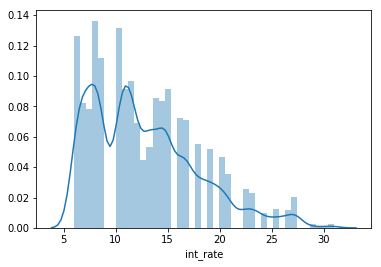

In [38]:
import seaborn as sns
sns.distplot(managers['int_rate']);

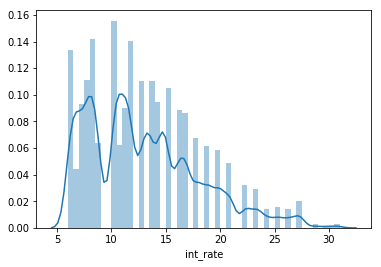

In [39]:
sns.distplot(plebians['int_rate']);

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [40]:
df['issue_d'].head().values

array(['Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018'],
      dtype=object)

In [41]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [43]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [44]:
df['issue_d'].describe()

count                  128412
unique                      3
top       2018-10-01 00:00:00
freq                    46305
first     2018-10-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

In [45]:
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
5         2018
6         2018
7         2018
8         2018
9         2018
10        2018
11        2018
12        2018
13        2018
14        2018
15        2018
16        2018
17        2018
18        2018
19        2018
20        2018
21        2018
22        2018
23        2018
24        2018
25        2018
26        2018
27        2018
28        2018
29        2018
30        2018
31        2018
32        2018
33        2018
34        2018
35        2018
36        2018
37        2018
38        2018
39        2018
40        2018
41        2018
42        2018
43        2018
44        2018
45        2018
46        2018
47        2018
48        2018
49        2018
50        2018
51        2018
52        2018
53        2018
54        2018
55        2018
56        2018
57        2018
58        2018
59        2018
60        2018
61        2018
62        2018
63        2018
64        2018
65        2018
66        

In [46]:
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
30        12
31        12
32        12
33        12
34        12
35        12
36        12
37        12
38        12
39        12
40        12
41        12
42        12
43        12
44        12
45        12
46        12
47        12
48        12
49        12
50        12
51        12
52        12
53        12
54        12
55        12
56        12
57        12
58        12
59        12
60        12
61        12
62        12
63        12
64        12
65        12
66        12
67        12
68        12
69        12
70        12
71        12
72        12
73        12
74        12
75        12
76        12

In [0]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

In [48]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      10000        10000          10000.0   36 months     10.33       324.23   
1       9600         9600           9600.0   36 months     12.98       323.37   
2       4000         4000           4000.0   36 months     23.40       155.68   
3       2500         2500           2500.0   36 months     13.56        84.92   
4      30000        30000          30000.0   60 months     18.94       777.23   

  grade sub_grade   emp_title emp_length home_ownership  annual_inc  \
0     B        B1      Uknown   < 1 year       MORTGAGE    280000.0   
1     B        B5      Uknown        NaN       MORTGAGE     35704.0   
2     E        E1    Security    3 years           RENT     90000.0   
3     C        C1        Chef  10+ years           RENT     55000.0   
4     D        D2  Postmaster  10+ years       MORTGAGE     90000.0   

  verification_status    issue_d loan_status pymnt_plan             purpose  \
0        Not Verified 2018-12-01     Current          n  debt_consolidation   
1        Not Verified 2018-12-01     Current          n    home_improvement   
2     Source Verified 2018-12-01     Current          n  debt_consolidation   
3        Not Verified 2018-12-01     Current          n  debt_consolidation   
4     Source Verified 2018-12-01     Current          n  debt_consolidation   

                title zip_code addr_state    dti  delinq_2yrs  \
0  Debt consolidation    974xx         OR   6.15            2   
1    Home improvement    401xx         KY   0.84            0   
2  Debt consolidation    070xx         NJ  26.33            0   
3  Debt consolidation    109xx         NY  18.24            0   
4  Debt consolidation    713xx         LA  26.52            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1996               0                    18.0   
1         Nov-2003               0                    69.0   
2         Sep-2006               4                    59.0   
3         Apr-2001               1                     NaN   
4         Jun-1987               0                    71.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN         5        0        748      11.5%         23   
2                     NaN        15        0       5199      19.2%         20   
3                    45.0         9        1       4341      10.3%         34   
4                    75.0        13        1      12315      24.2%         44   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    9279.39        9279.39       964.08           964.08   
1                   w    8934.25        8934.25       994.35           994.35   
2                   w    3762.39        3762.39       459.24           459.24   
3                   w    2328.06        2328.06       251.94           251.94   
4                   w   29074.35       29074.35      2284.34          2284.34   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           720.61         243.47                 0.0         0.0   
1           665.75         328.60                 0.0         0.0   
2           237.61         221.63                 0.0         0.0   
3           171.94          80.00                 0.0         0.0   
4           925.65        1358.69                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Apr-2019           324.23     Apr-2019   
1                      0.0     Apr-2019           323.37     May-2019   
2                      0.0     Apr-2019           155.68     Apr-2019   
3                      0.0     Apr-2019            84.92     Apr-2019   
4                      0.0     Apr-2019           777.23     Apr-2019   

  last_credit_pull_d  

In [49]:
df['issue_month'].value_counts()

10    46305
11    41973
12    40134
Name: issue_month, dtype: int64

In [50]:
df.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [51]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [52]:
df['earliest_cr_line'].head()

0    Jan-1996
1    Nov-2003
2    Sep-2006
3    Apr-2001
4    Jun-1987
Name: earliest_cr_line, dtype: object

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)

In [54]:
df['issue_d'] - df['earliest_cr_line']

0         8370 days
1         5509 days
2         4474 days
3         6453 days
4        11506 days
5         2801 days
6         7973 days
7         8735 days
8         4870 days
9         4870 days
10        4992 days
11        4809 days
12        3013 days
13        7001 days
14        4232 days
15        5570 days
16        5174 days
17        3409 days
18        5113 days
19        4079 days
20        6239 days
21        5113 days
22        5023 days
23        4627 days
24        7243 days
25        3287 days
26        4992 days
27        5782 days
28        2891 days
29        5023 days
30        5570 days
31        2282 days
32        2891 days
33        1979 days
34        4901 days
35        2648 days
36        7062 days
37        9862 days
38       10015 days
39       11201 days
40        1522 days
41        4413 days
42        1522 days
43        5997 days
44        3378 days
45        3136 days
46        6270 days
47        1522 days
48        6331 days
49        6635 days


In [55]:
(df['issue_d'] - df['earliest_cr_line']).dt.days

0          8370
1          5509
2          4474
3          6453
4         11506
5          2801
6          7973
7          8735
8          4870
9          4870
10         4992
11         4809
12         3013
13         7001
14         4232
15         5570
16         5174
17         3409
18         5113
19         4079
20         6239
21         5113
22         5023
23         4627
24         7243
25         3287
26         4992
27         5782
28         2891
29         5023
30         5570
31         2282
32         2891
33         1979
34         4901
35         2648
36         7062
37         9862
38        10015
39        11201
40         1522
41         4413
42         1522
43         5997
44         3378
45         3136
46         6270
47         1522
48         6331
49         6635
50         2618
51        16346
52         4171
53         7608
54         4717
55         4658
56         5601
57         2801
58         3470
59         5174
60         3987
61         5327
62      

In [56]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      10000        10000          10000.0   36 months     10.33       324.23   
1       9600         9600           9600.0   36 months     12.98       323.37   
2       4000         4000           4000.0   36 months     23.40       155.68   
3       2500         2500           2500.0   36 months     13.56        84.92   
4      30000        30000          30000.0   60 months     18.94       777.23   

  grade sub_grade   emp_title emp_length home_ownership  annual_inc  \
0     B        B1      Uknown   < 1 year       MORTGAGE    280000.0   
1     B        B5      Uknown        NaN       MORTGAGE     35704.0   
2     E        E1    Security    3 years           RENT     90000.0   
3     C        C1        Chef  10+ years           RENT     55000.0   
4     D        D2  Postmaster  10+ years       MORTGAGE     90000.0   

  verification_status    issue_d loan_status pymnt_plan             purpose  \
0        Not Verified 2018-12-01     Current          n  debt_consolidation   
1        Not Verified 2018-12-01     Current          n    home_improvement   
2     Source Verified 2018-12-01     Current          n  debt_consolidation   
3        Not Verified 2018-12-01     Current          n  debt_consolidation   
4     Source Verified 2018-12-01     Current          n  debt_consolidation   

                title zip_code addr_state    dti  delinq_2yrs  \
0  Debt consolidation    974xx         OR   6.15            2   
1    Home improvement    401xx         KY   0.84            0   
2  Debt consolidation    070xx         NJ  26.33            0   
3  Debt consolidation    109xx         NY  18.24            0   
4  Debt consolidation    713xx         LA  26.52            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0       1996-01-01               0                    18.0   
1       2003-11-01               0                    69.0   
2       2006-09-01               4                    59.0   
3       2001-04-01               1                     NaN   
4       1987-06-01               0                    71.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN         5        0        748      11.5%         23   
2                     NaN        15        0       5199      19.2%         20   
3                    45.0         9        1       4341      10.3%         34   
4                    75.0        13        1      12315      24.2%         44   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    9279.39        9279.39       964.08           964.08   
1                   w    8934.25        8934.25       994.35           994.35   
2                   w    3762.39        3762.39       459.24           459.24   
3                   w    2328.06        2328.06       251.94           251.94   
4                   w   29074.35       29074.35      2284.34          2284.34   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           720.61         243.47                 0.0         0.0   
1           665.75         328.60                 0.0         0.0   
2           237.61         221.63                 0.0         0.0   
3           171.94          80.00                 0.0         0.0   
4           925.65        1358.69                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Apr-2019           324.23     Apr-2019   
1                      0.0     Apr-2019           323.37     May-2019   
2                      0.0     Apr-2019           155.68     Apr-2019   
3                      0.0     Apr-2019            84.92     Apr-2019   
4                      0.0     Apr-2019           777.23     Apr-2019   

  last_credit_pull_d  

In [57]:
df['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [0]:
25171 / 365

68.96164383561644

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [58]:
# df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# df.head()

df['term'] = df['term'].str.strip()
df['term'].loc[0]

'36 months'

In [59]:
df['term'].describe()

count        128412
unique            2
top       36 months
freq          88179
Name: term, dtype: object

In [0]:
df['term'] = df['term'].apply(lambda x: x.strip(' months'))

In [0]:
df['term'] = df['term'].astype(int)

In [73]:
df['term'].describe()

count    128412.000000
mean         43.519484
std          11.132203
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term, dtype: float64

In [84]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (16-30 days)', 'Late (31-120 days)',
       'In Grace Period', 'Charged Off', 'Default'], dtype=object)

In [0]:
def new_values(status):
  if status == 'Current':
    return 1
  if status == 'Fully Paid':
    return 1
  else:
    return 0
  
df['loan_status'] = df['loan_status'].apply(new_values)

In [87]:
df['loan_status']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83  

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01